实战干货：用 Python 批量下载百度图片！https://zhuanlan.zhihu.com/p/96520812

⚠️⚠️⚠️ 代码可能会因为网页结构变化而失效

In [36]:
import requests 
import re
import os
import time
import cv2
import matplotlib.pyplot as plt

In [37]:
# 获取图片url连接
def get_parse_page(pn,name):

    for i in range(int(pn)):
        # 1.获取网页
        print('正在获取第{}页'.format(i+1))

        # 百度图片首页的url
        # name是你要搜索的关键词
        # pn是你想下载的页数

        url = 'https://image.baidu.com/search/flip?tn=baiduimage&ie=utf-8&word=%s&pn=%d' %(name,i*20)

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.104 Safari/537.36 Core/1.53.4843.400 QQBrowser/9.7.13021.400'}

        # 发送请求，获取相应
        response = requests.get(url, headers=headers)
        html = response.content.decode()
        # print(html)

        # 2.正则表达式解析网页
        # "objURL":"http://n.sinaimg.cn/sports/transform/20170406/dHEk-fycxmks5842687.jpg"
        results = re.findall('"objURL":"(.*?)",', html) # 返回一个列表

        # 根据获取到的图片链接，把图片保存到本地
        save_to_txt(results, name, i)

In [38]:
def save_to_txt(results, name, i):

    j = 0
    # 在当目录下创建文件夹
    if not os.path.exists('./' + name):
        os.makedirs('./' + name)

    # 下载图片
    for result in results:
        print('正在保存第{}个'.format(j))
        try:
            pic = requests.get(result, timeout=10)
            time.sleep(1)
        except:
            print('当前图片无法下载')
            j += 1
            continue

        # 可忽略，这段代码有bug
        # file_name = result.split('/')
        # file_name = file_name[len(file_name) - 1]
        # print(file_name)
        #
        # end = re.search('(.png|.jpg|.jpeg|.gif)$', file_name)
        # if end == None:
        #     file_name = file_name + '.jpg'

        # 把图片保存到文件夹
        file_full_name = './' + name + '/' + str(i) + '-' + str(j) + '.jpg'
        with open(file_full_name, 'wb') as f:
            f.write(pic.content)

        j += 10

In [44]:
if __name__ == '__main__':

    name = input('请输入你要下载的关键词：')
    pn = input('你想下载前几页（1页有60张）:')
    get_parse_page(pn, name)

请输入你要下载的关键词： panda
你想下载前几页（1页有60张）: 1


正在获取第1页
正在保存第0个
正在保存第10个
正在保存第20个
当前图片无法下载
正在保存第21个
正在保存第31个
正在保存第41个
正在保存第51个
正在保存第61个
正在保存第71个
正在保存第81个
正在保存第91个
正在保存第101个
正在保存第111个
正在保存第121个
正在保存第131个
正在保存第141个
正在保存第151个
正在保存第161个
正在保存第171个
正在保存第181个
正在保存第191个
正在保存第201个
正在保存第211个
正在保存第221个
正在保存第231个
正在保存第241个
正在保存第251个
正在保存第261个
正在保存第271个
正在保存第281个
正在保存第291个
正在保存第301个
正在保存第311个
正在保存第321个
正在保存第331个
正在保存第341个
正在保存第351个
正在保存第361个
正在保存第371个
正在保存第381个
正在保存第391个
正在保存第401个
正在保存第411个
正在保存第421个
正在保存第431个
正在保存第441个
正在保存第451个
正在保存第461个
正在保存第471个
正在保存第481个
正在保存第491个
正在保存第501个
正在保存第511个
正在保存第521个
正在保存第531个
正在保存第541个
正在保存第551个
正在保存第561个
正在保存第571个
正在保存第581个


In [63]:
base_dir="panda"
name_list = []
num = 1
for file in os.listdir(base_dir):
    os.rename(os.path.join(base_dir,file),os.path.join(base_dir,"panda."+str(num)+".jpg"))
    name_list.append("panda."+str(num)+".jpg")
    num = num + 1

panda/panda.30.jpg


TypeError: Image data of dtype object cannot be converted to float

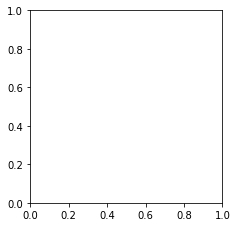

In [62]:
num=0
plt.figure(figsize=(20,10))
for fn in os.listdir(base_dir):
    file_name = name_list.pop()
    path_name = os.path.join(base_dir,file_name)
    print(path_name)
    img = cv2.imread(path_name)
    plt.subplot(2,5,num+1)
    plt.imshow(img)   
    plt.xlabel(file_name)
    num +=1
    if(num>=10): break
plt.show()